<a href="https://colab.research.google.com/github/sujitpal/nlp-deeplearning-ai-examples/blob/master/x0_0_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

%matplotlib inline

## Exercise 1.01

In [2]:
tensor_1 = torch.tensor([0.1, 1, 0.9, 0.7, 0.3])
tensor_2 = torch.tensor([[0, 0.2, 0.4, 0.6],
                         [1, 0.8, 0.6, 0.4]])
tensor_3 = torch.tensor([
                         [[0.3, 0.6],
                          [1,   0]], \
                         [[0.3, 0.6],
                          [0,   1]]
                         ])
tensor_1.shape, tensor_2.shape, tensor_3.shape

(torch.Size([5]), torch.Size([2, 4]), torch.Size([2, 2, 2]))

In [3]:
torch.cuda.is_available()

True

In [4]:
tensor_1g = tensor_1.to("cuda")
tensor_2g = tensor_2.to("cuda")
tensor_3g = tensor_3.to("cuda")
tensor_1g.shape, tensor_2g.shape, tensor_3g.shape

(torch.Size([5]), torch.Size([2, 4]), torch.Size([2, 2, 2]))

## Exercise 1.02

In [5]:
input_units = 10
output_units = 1
model = nn.Sequential(
    nn.Linear(input_units, output_units),
    nn.Sigmoid()
)
print(model)

Sequential(
  (0): Linear(in_features=10, out_features=1, bias=True)
  (1): Sigmoid()
)


In [6]:
loss_fn = nn.MSELoss()
print(loss_fn)

MSELoss()


In [7]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [8]:
x = torch.randn(20,10)
y = torch.randint(0, 2, (20,1)).type(torch.FloatTensor)

In [9]:
losses = []
for i in range(100):
  y_pred = model(x)
  loss = loss_fn(y_pred, y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  losses.append(loss.item())
  if i % 5 == 0:
    print(i, loss.item())

0 0.283000111579895
5 0.2811126410961151
10 0.27925267815589905
15 0.2774205803871155
20 0.27561691403388977
25 0.2738420367240906
30 0.2720961570739746
35 0.2703796625137329
40 0.26869285106658936
45 0.2670358717441559
50 0.26540884375572205
55 0.2638119161128998
60 0.26224517822265625
65 0.26070860028266907
70 0.25920218229293823
75 0.25772589445114136
80 0.2562796175479889
85 0.2548632025718689
90 0.25347650051116943
95 0.25211936235427856


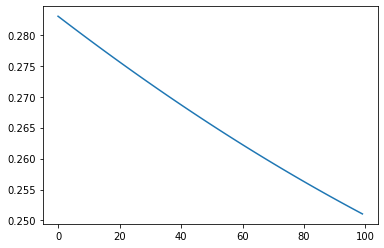

In [10]:
plt.plot(np.arange(len(losses)), losses)
_ = plt.show()